<a href="https://colab.research.google.com/github/nmercado1986/jupyter-notebooks/blob/master/covid-ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudiando la evolución del COVID-19 en Argentina usando medias móviles

El uso del cruce de medias móviles es una técnica recurrente en el análisis estadístico para identificar cambios en tendencias. [[1]](https://mt4trendindicator.com/using-moving-averages/)


Vamos a utilizar esta técnica para comparar los "picos" de casos, máximos relativos de la función:


$C_{pais}(i \in \mathbb{N}) \to \mathbb{N}$

Para estudiar, vamos a utilizar la media móvil simple y la media móvil exponencial de los 14 últimos días.

Donde $i$ indica el número de días transcurridos desde el primer caso confirmado a nivel mundial, y $C_{pais}$ indica la cantidad de casos confirmados para un país para la fecha indicada por $i$.

## 1. Instalamos dependencias

In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))

Pandas version: 1.0.5
Matplotlib version: 3.2.2


## 2. Un vistazo inicial
Los datos están en el dataframe `df`. Como vemos, están indexados por fecha. Gracias a la gente de [Sistemas Mapache](https://github.com/SistemasMapache/Covid19arData) por estos datos.
Parecen tener la ventaja además de contar con un feature que es el índice ordinal de día de la pandemia, de cuarentena.

In [4]:
url = 'https://docs.google.com/spreadsheets/d/16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA/export?format=csv&id=16-bnsDdmmgtSxdWbVMboIHo5FRuz76DBxsz_BbsEVWA&gid=0'
df = pd.read_csv(url)
print(df.head())

       fecha  dia_inicio  ...     observacion covid19argentina_admin_level_4
0  2/03/2020           1  ...  no hay informe                capital-federal
1  3/03/2020           2  ...  no hay informe                        no-data
2  4/03/2020           3  ...  no hay informe                        no-data
3  5/03/2020           4  ...             NaN                   buenos-aires
4  6/03/2020           5  ...             NaN                        no-data

[5 rows x 19 columns]


> ⚠️ **OJO**: Los datos no están agregados por fecha, hacia el final del dataset vemos muchas entradas para el mismo día.
Viendo con atención, parece que están agrupados por provincia/día

In [5]:
print(df.tail())

           fecha  dia_inicio  ...  observacion covid19argentina_admin_level_4
2987  18/08/2020         167  ...          NaN                            NaN
2988  18/08/2020         167  ...          NaN                            NaN
2989  18/08/2020         167  ...          NaN                            NaN
2990  18/08/2020         167  ...          NaN                            NaN
2991  18/08/2020         167  ...          NaN                            NaN

[5 rows x 19 columns]


**Empecemos ploteando la cantidad de casos y fallecidos por dia de la pandemia.**

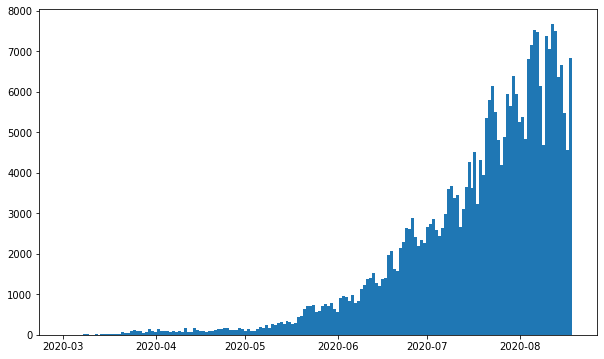

In [6]:
#print(df)
df.fecha = pd.to_datetime(df.fecha, format='%d/%m/%Y')
porDia = df.nue_casosconf_diff.groupby(df.fecha).sum()
porDia = df.resample('D', on='fecha').sum()
plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1);

## Ploteamos el MA para las últimas dos y tres semanas

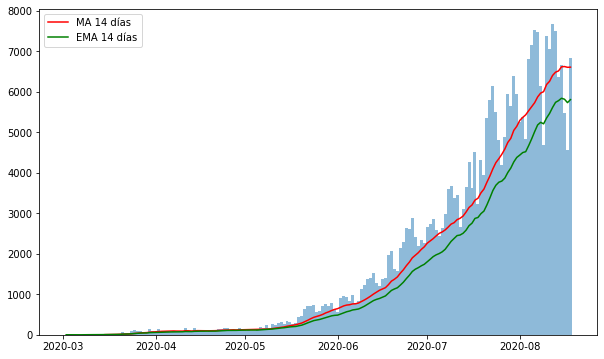

In [7]:
plt.bar(porDia.index, porDia.nue_casosconf_diff, width=1, alpha=.5);
# Calculamos el MA
ma14 = porDia.nue_casosconf_diff.rolling(14)
ema14 = porDia.nue_casosconf_diff.ewm(14)
plt.plot(porDia.index, ma14.mean(), color='r', label='MA 14 días');
plt.plot(porDia.index, ema14.mean(), color='g', label='EMA 14 días');
plt.legend();


## Comparando la relación entre casos y MA entre países
El siguiente csv contiene información agrupada por país y fecha. Comparemos por ejemplo con España.
Posteriormente al acontencimiento del pico, se nota un máximo relativo en el MA

In [16]:
def comparar(countryNameA, countryNameB):

  ax = plt.subplot('111')
  dfMundo = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
  dfMundo['Date_reported'] = pd.to_datetime(dfMundo.Date_reported, infer_datetime_format=True)

  country_a = dfMundo[dfMundo[' Country'] == countryNameA].resample('D', on='Date_reported')[' New_cases'].mean()
  country_a_ma = country_a.rolling(14).mean()
  country_a_ema = country_a.ewm(14).mean()

  country_b = dfMundo[dfMundo[' Country'] == countryNameB].resample('D', on='Date_reported')[' New_cases'].mean()
  country_b_ma = country_b.rolling(14).mean()
  country_b_ema = country_b.ewm(14).mean()

  plt.bar(country_b.index, country_b, color='pink', width=1, alpha=.25, label='Casos ' + countryNameB);
  plt.plot(country_b_ma.index, country_b_ma, color='red', label=countryNameB + ' MA');
  plt.plot(country_b_ema.index, country_b_ema, color='orange', label=countryNameB +' EMA');
  plt.bar(country_a.index, country_a, color='lightblue', width=1, alpha=.25, label='Casos ' + countryNameA);
  plt.plot(country_a_ma.index, country_a_ma, color='blue', label=countryNameA + ' MA');
  plt.plot(country_a_ema.index, country_a_ema, color='green', label=countryNameA +' EMA');


  plt.legend();


# Con relación a España

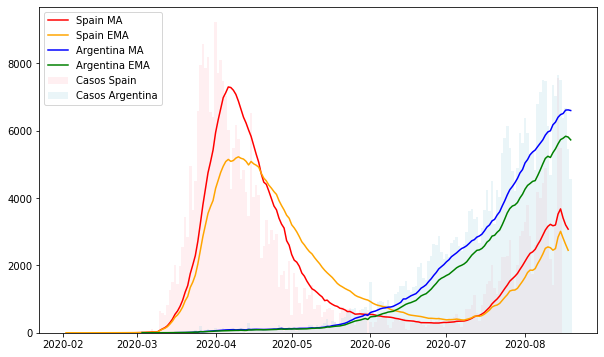

In [17]:
comparar('Argentina', 'Spain')

# Con relación a Alemania

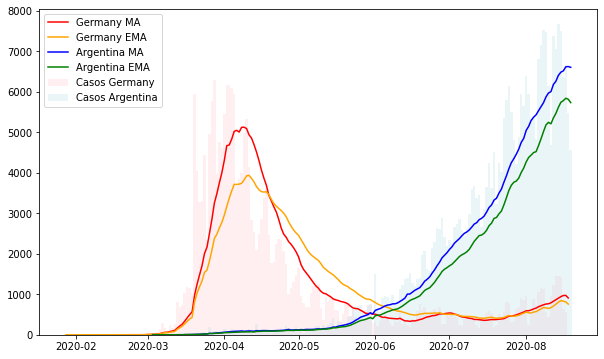

In [18]:
comparar('Argentina', 'Germany')

# Con relación a Brasil

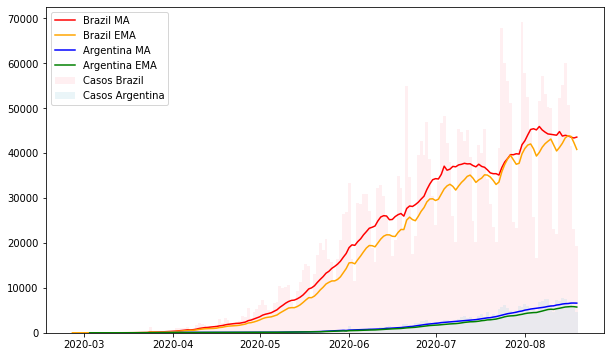

In [19]:
comparar('Argentina', 'Brazil')

# Con relación a Estados Unidos

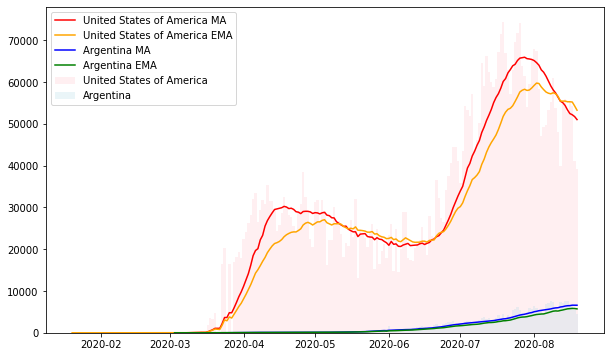

In [13]:
comparar('Argentina', 'United States of America')